<a href="https://colab.research.google.com/github/gmehra123/data_science_projs/blob/main/Survival_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Survival Analysis

### Introduction
* Developed for clinical trials.
* Branch of statistics used to study time to event.
* eg. Time to machine breakdown, Time to  death etc.
* **Survival** means the event does not occur
* **Survival Duration** means the time till event of interest occurs
* Survival analysis looks at the observed rate of event occurence and makes inferences on the underlying patterns
* Typically includes duration column and observed column
* Questions that survival analysis helps answer
  * Calculate proportion of subjects that will experience an event
  * Estimate the avg,median time till the event in a population
  * Subsegments etc

### Why use survival analysis
* **Censorship** happens when the time to an event is only partially known. In some cases for a particular record you have reached the end of the study period and the event has not occured. For such observations you know that the time to event is atleat the duration observed. This is **right censored**.
* If the event occured during the study but we dont know when then the data is **left censored**. The duration is less than what we observed
* **Interval censored** The survival duration is within a certain range. Typically for observations that drop in and out of a study
* **Right censorship** is the most common
* Survival analysis does not impute censored data
* Some data pre-processing steps
  * check for cnensorship columns (or create one)
  * Calculate prportion of censored observations. If more than 50% are censored then survival anlaysis will have limited predictive power

#### Survival curve
* It is a way to visualize the probability distribution of survival.
* The survival function is S(t) = Pr(T>t)
* Two types of models
  * Non parametric modeling -: We do not make any assumptions about the distribution of the data. Not smooth. Approches smoothness for large datasets  
  * Parametric -: We make suumptions about the shape/distribution of the data. Exponential, linear etc

### Kaplan Meier Estimator
* The Kaplan Meier estimator is a non-parametric estimator. This means it strictly draws the curve from data and has no underlying function/equation/algorithm and does not assume any underlying distribution
* if t_i represents time t_i
* if d_i represents represents number of events in time t_i
* if n_i represents number of individuals that have survived in time t_i
then

s(t) = sum[(1-d_i/n_i)]

#### Must satisfy the following conditions
* Events are unambigously defined
* Survival probabilities are comparable in all subjects, not dependent on when an individual entered the study
* Censorship is non-informative

#### Benefits
* Intuitive survival
* Flexible to use on any time to event dataset
* Usually the first model

#### Cons
* Survival curve is not smooth
* does not give median survival time in the case more than 50% of observations are censored.



### Kaplan Meier Estimator in practice

In [1]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 9.5 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=d31a0d5678ce6ddf18e4522e793ad9a767db7974efc6234802c9a942ea4f6b57
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [2]:
from lifelines import KaplanMeierFitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Datacamp/Survival Analysis (1)")

In [ ]:
regime = pd.read_csv('dd.csv')

In [ ]:
regime.head()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [ ]:
kmf = KaplanMeierFitter()
kmf.fit(regime['duration'],regime['observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

In [ ]:
print("The Median survival time of a regime is",kmf.median_survival_time_)
kmf.survival_function_

The Median survival time of a regime is 4.0


,KM_estimate
timeline,
0.0,1.000000
1.0,0.721792
2.0,0.601973
3.0,0.510929
4.0,0.418835
5.0,0.334008
6.0,0.280902
7.0,0.256825
8.0,0.221975


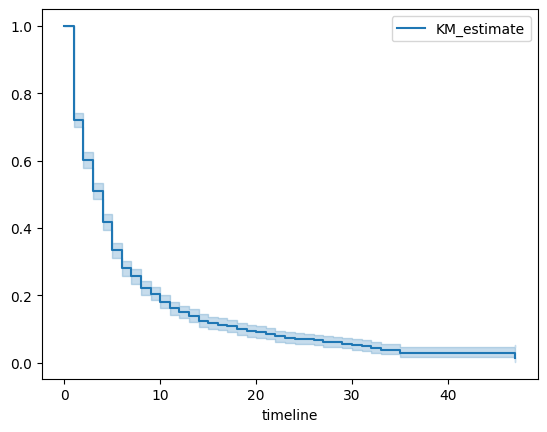

In [ ]:
kmf.plot_survival_function()
plt.show()

In [ ]:
kmf_w_europe = KaplanMeierFitter()
kmf_s_asia= KaplanMeierFitter()

In [ ]:
kmf_w_europe.fit(regime.loc[regime.un_region_name=='Western Europe','duration'],
                 regime.loc[regime.un_region_name=='Western Europe','observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 164 total observations, 11 right-censored observations>

In [ ]:
kmf_s_asia.fit(regime.loc[regime.un_region_name=='Southern Asia','duration'],
                 regime.loc[regime.un_region_name=='Southern Asia','observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 98 total observations, 27 right-censored observations>

<Axes: xlabel='timeline'>

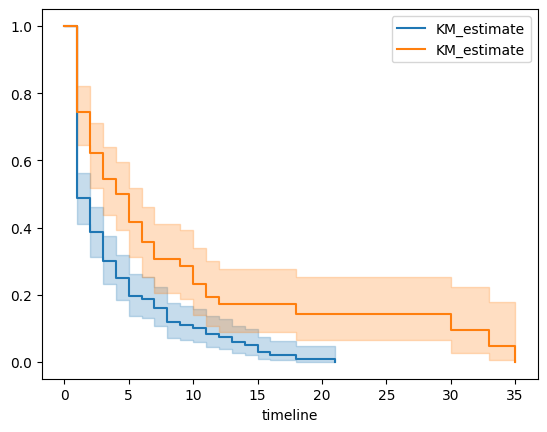

In [ ]:
fig,ax = plt.subplots()
kmf_w_europe.plot_survival_function(ax=ax)
kmf_s_asia.plot_survival_function(ax=ax)

### Weibull Model
* weibull model is a parametric maodel that returns a smooth curve.
* It fits the data to a probability distribution
* Has 2 parameters
  * **k** is the shape parameter. keeping lambda constant k determines the shape of the distribution. If K < 1 then the slope is steep in the first few months and then flattens out. If k > 1 then the event rate is slow in the beginning and then increases over time.
  * **lambda** is the scale parameter. Determines the height and width of the distribution. it is when 63.2% of the population has experienced the event

In [ ]:
from lifelines import WeibullFitter

In [ ]:
wb = WeibullFitter()

In [ ]:
wb.fit(regime['duration'],regime['observed'])

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 1808 total observations, 340 right-censored observations>

<Axes: >

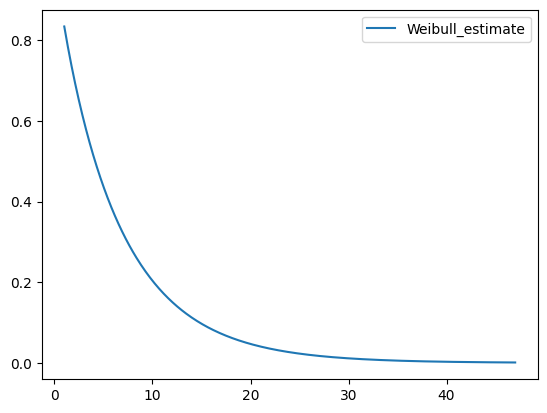

In [ ]:
wb.survival_function_.plot()

In [ ]:
wb.predict([41,42,43])

41    0.002439
42    0.002124
43    0.001851
Name: Weibull_estimate, dtype: float64

### Weibull AFT model
* AFT means accelarated failure rate.
* This model can look at populations with related survivals and given a bunch of environmental factors can estimate how those environmental factors impact survival. It is essentially a survival regression.


In [ ]:
from lifelines import WeibullAFTFitter

In [ ]:
aft = WeibullAFTFitter()

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1803,Zambia,551,551.0,Eastern Africa,Africa,Levy Patrick Mwanawasa,Levy Patrick Mwanawasa.Zambia.2002.2007.Civili...,Non-democracy,Civilian Dict,2002,6,1
1804,Zambia,551,551.0,Eastern Africa,Africa,Rupiah Bwezani Banda,Rupiah Bwezani Banda.Zambia.2008.2008.Civilian...,Non-democracy,Civilian Dict,2008,1,0
1805,Zimbabwe,552,552.0,Eastern Africa,Africa,Ian Smith,Ian Smith.Zimbabwe.1965.1978.Civilian Dict,Non-democracy,Civilian Dict,1965,14,1
1806,Zimbabwe,552,552.0,Eastern Africa,Africa,Abel Muzorewa,Abel Muzorewa.Zimbabwe.1979.1979.Civilian Dict,Non-democracy,Civilian Dict,1979,1,1


### Weibull with covariates
* We can build a survival regression with co-variates.
* This can help us estimate how much changing one factor will change the surviva. In effect it gives a survival equation

In [ ]:
from lifelines import WeibullFitter
from lifelines import LogNormalFitter
from lifelines import ExponentialFitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
wb = WeibullFitter()
ln = LogNormalFitter()
exp = ExponentialFitter()

In [ ]:
heart = pd.read_csv('https://assets.datacamp.com/production/repositories/5850/datasets/3622fc55c18f157f4faa09c31458778b1e26f152/echocardiogram.csv')

In [ ]:
heart.head()
from lifelines.plotting import qq_plot

In [ ]:
heart["death"] = np.where(heart["alive"]==0,1,0)

In [ ]:
heart.dropna(subset="survival",inplace=True)

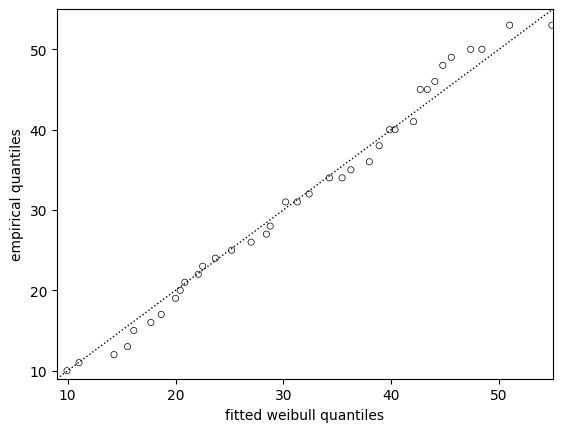

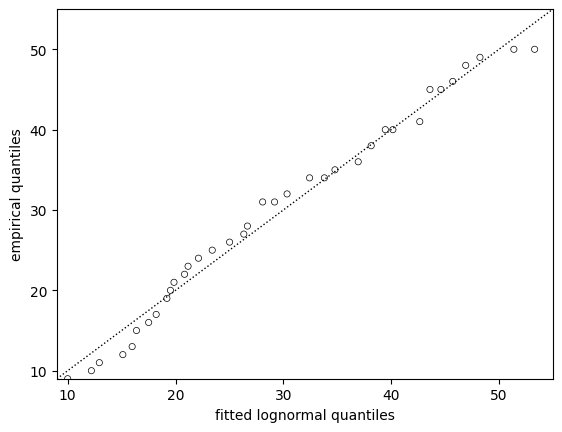

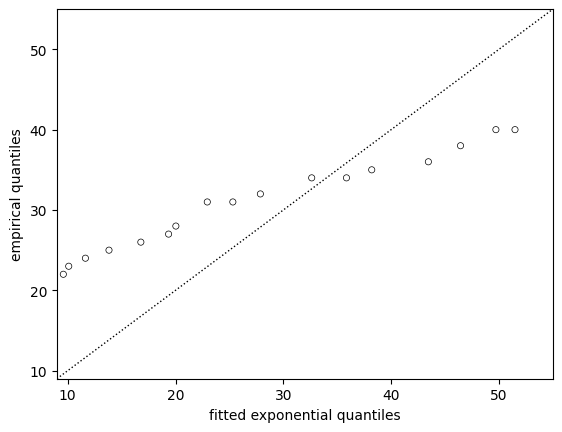

In [ ]:
models = [wb,ln,exp]
for model in models:
  model.fit(heart['survival'],heart['death'])
  qq_plot(model)
  plt.show()

In [ ]:
from lifelines import LogNormalAFTFitter

In [ ]:
heart["fractionalshortening"].fillna(heart["fractionalshortening"].mean(),inplace=True)

In [ ]:
ln = LogNormalAFTFitter()

In [ ]:
ln.fit(df=heart,event_col="death",duration_col="survival",formula="fractionalshortening")

<lifelines.LogNormalAFTFitter: fitted with 130 total observations, 42 right-censored observations>

In [ ]:
ln.summary

coef  exp(coef)  se(coef)  coef lower 95%  \
param  covariate                                                             
mu_    Intercept             3.290119  26.846050  0.110741        3.073070   
       fractionalshortening  0.175246   1.191540  0.430349       -0.668222   
sigma_ Intercept            -0.813152   0.443458  0.074817       -0.959790   

                             coef upper 95%  exp(coef) lower 95%  \
param  covariate                                                   
mu_    Intercept                   3.507167            21.608145   
       fractionalshortening        1.018715             0.512619   
sigma_ Intercept                  -0.666514             0.382973   

                             exp(coef) upper 95%  cmp to          z  \
param  covariate                                                      
mu_    Intercept                       33.353645     0.0  29.710032   
       fractionalshortening             2.769633     0.0   0.407220   
sigma_ Intercept                        0.513496     0.0 -10.868575   

                                         p    -log2(p)  
param  covariate                                        
mu_    Intercept             5.697849e-194  641.943633  
       fractionalshortening   6.838468e-01    0.548255  
sigma_ Intercept              1.627232e-27   88.989639

<Axes: >

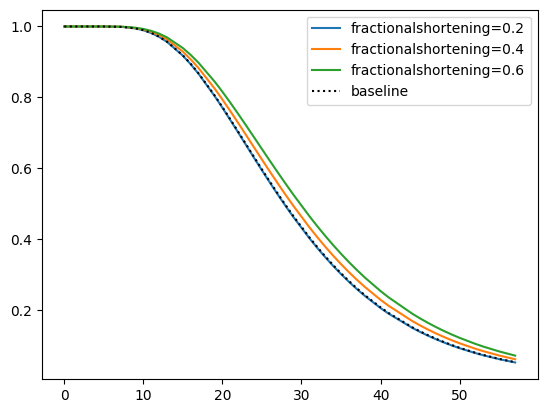

In [ ]:
ln.plot_partial_effects_on_outcome("fractionalshortening",values=[0.2,0.4,0.6])

In [ ]:
heart["fractionalshortening"].median()

0.216869918699187

In [ ]:
heart["fractionalshortening"].max()

0.61

### Cox proportional Hazards
* Unlike AFT models where the regression estimates the accelration factor along a baseline curve, the proportional hazards model estimates hazard and survival by estimating the effect of covariates on a baseline curve.
* The baseline curve is assumed to be at the median values of all the covariates.
* model.baseline_hazard_plot()
* model.baseline_survival_plot()
* e**coef gives you the increase in Hazard.
* e**0.4 gives you 1.5 which is a 50% increase in the hazard
* to get survival 1/e**0.4-1 = 0.67-1 = -0.23 or a 23% decrease in median survival time

In [ ]:
from lifelines import CoxPHFitter

In [ ]:
cph = CoxPHFitter()

In [ ]:
heart.isna().sum()

survival                 0
alive                    0
age                      5
pericardialeffusion      0
fractionalshortening     0
epss                    14
lvdd                    10
wallmotion-score         3
wallmotion-index         1
mult                     3
name                     0
group                   22
aliveat1                57
death                    0
dtype: int64

In [ ]:
heart.shape

(130, 14)

In [ ]:
heart.drop(columns=['aliveat1','epss','lvdd','group'],inplace=True)

In [ ]:
cph.fit(df=heart,event_col="death",duration_col="survival",formula="pericardialeffusion+fractionalshortening")

<lifelines.CoxPHFitter: fitted with 130 total observations, 42 right-censored observations>

In [ ]:
cph.check_assumptions(training_df = heart, p_value_threshold=0.10)

Proportional hazard assumption looks okay.


[]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
heart.dropna(inplace=True)

In [ ]:
heart.drop(columns=["name"],inplace=True)

In [ ]:
cph.fit(df=heart,event_col="death",duration_col="survival")

<lifelines.CoxPHFitter: fitted with 122 total observations, 38 right-censored observations>

In [ ]:
cph.predict_median(n)

10     inf
11    31.0
12    32.0
13    27.0
14     inf
Name: 0.5, dtype: float64

In [ ]:
n=heart.iloc[10:15,1:-1]

In [4]:
df = pd.DataFrame({'obs':[1,2,3,4],'duration':[5,3,10,15],'event':[1,1,0,0]})

In [5]:
kmf_toy = KaplanMeierFitter()

In [7]:
kmf_toy.fit(durations=df['duration'],event_observed=df['event'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 4 total observations, 2 right-censored observations>

In [8]:
kmf_toy.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,4,4
3.0,1,1,0,0,4
5.0,1,1,0,0,3
10.0,1,0,1,0,2
15.0,1,0,1,0,1


In [14]:
kmf_toy.survival_function_

,KM_estimate
timeline,
0.0,1.00
3.0,0.75
5.0,0.50
10.0,0.50
15.0,0.50


<Axes: xlabel='timeline'>

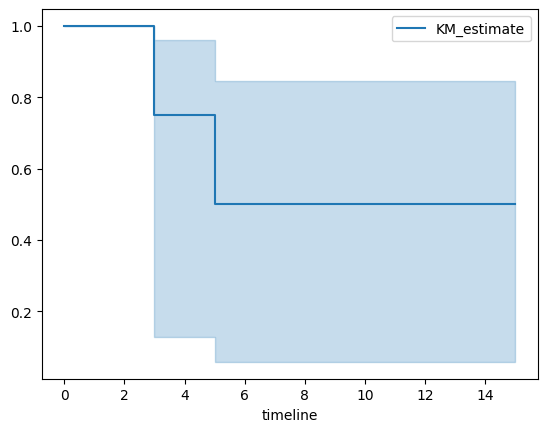

In [15]:
kmf_toy.plot_survival_function()